# Running a Classification Tree

This is an assignment for week 1 of 'Machine Learning for Data Analysis' course by Wesleyan University.

The task at hand is to perform a decision tree analysis to test nonlinear relationships among a series of explanatory variables and a binary, categorical response variable. 

The dataset was prepared earlier and contains information about 217 countries for 2017: GDP, imports, exports, population, ease of doing business, whether a country is lanlocked and WTO status. The WTO status will be the binary, categorical response variable.

## Prepare the dataset 

In [1]:
# Import libraries for working with data
import pandas as pd
import numpy as np

In [2]:
# Download prepared csv file
data = pd.read_csv('openness_df.csv')

In [3]:
data.sample(5)

,country,year,gdp,gdp_ppc,imports,exports,population,business_ease,code,region,tariff,wto_status,landlocked,openness
30,Botswana,2017,1.740554e+10,7893.210108,5.900352e+09,6.957517e+09,2205128.0,65.71078,BWA,Sub-Saharan Africa,5.694763,Member,1,0.738723
16,Burkina Faso,2017,1.233034e+10,642.429839,4.465530e+09,3.742254e+09,19193284.0,51.15106,BFA,Sub-Saharan Africa,9.759566,Member,1,0.665658
111,St. Lucia,2017,1.816729e+09,10039.671414,NaN,NaN,180955.0,63.57439,LCA,Latin America & Caribbean,12.488861,Member,0,NaN
103,Kiribati,2017,1.855725e+08,1625.575970,1.707541e+08,2.452483e+07,114158.0,46.16176,KIR,East Asia & Pacific,32.303855,No perticipation,0,1.052306
69,Georgia,2017,1.624296e+10,4357.011625,9.341702e+09,7.557442e+09,3728004.0,83.01189,GEO,Europe & Central Asia,1.887536,Member,0,1.040398


In [4]:
# Bin WTO status into two categories
data["wto_status"] = data["wto_status"].replace({'Member': 1, 'Observer': 0, 'No perticipation': 0})

In [5]:
# Drop rows with missing values
data_clean = data.dropna()

## Buliding a Classification Tree

In [6]:
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

In [28]:
predictors = data_clean[['business_ease','tariff','openness','gdp_ppc']]

targets = data_clean.wto_status

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

print(pred_train.shape)
print(pred_test.shape)
print(tar_train.shape)
print(tar_test.shape)

(81, 4)
(54, 4)
(81,)
(54,)


In [46]:
# Build model on training data
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(pred_train,tar_train)

predictions = classifier.predict(pred_test)

print(sklearn.metrics.confusion_matrix(tar_test,predictions))
print(sklearn.metrics.accuracy_score(tar_test, predictions))

[[ 1  5]
 [ 0 48]]
0.9074074074074074


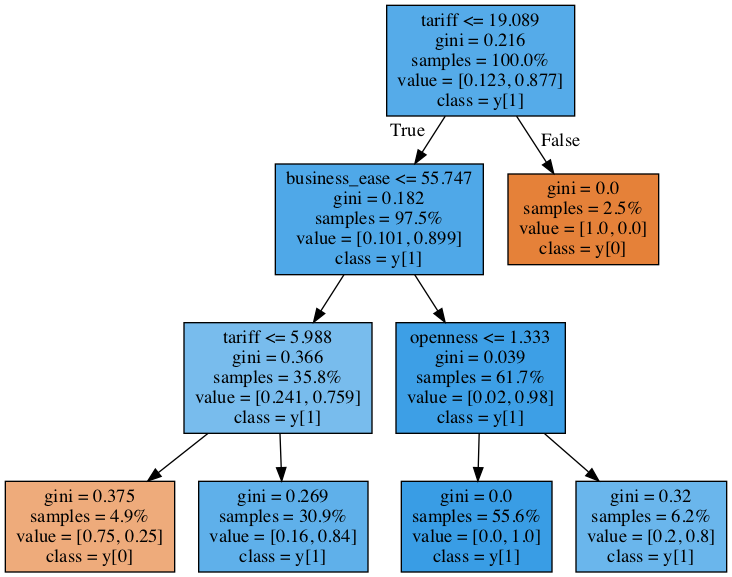

In [47]:
from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus

#Displaying the decision tree
out = StringIO()
tree.export_graphviz(classifier, out_file=out, filled=True, feature_names=predictors.columns, class_names=True, proportion=True)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

### Interpretation of the tree

Decision tree analysis was performed to test nonlinear relationships between binary response variable WTO membership and the following explanatory variables: Ease of doing business, Trade Openness, GPD per Capita, and applied MFN tariff. The accuracy score of the model is approximately 0.907, which means that 91% of the samples in the test group were predicted correctly. The model has 1 true positive, 48 true negatives, no false negatives, and 5 false positives.

I have limited depth of the three to 3 nodes, without limitation model produced 7 nodes which was too much for interpretation practice. Blue represents WTO members, orange non-Members. 

The tariff was the first variable to separate the sample into two subgroups. 100% of the countries with an applied tariff higher than 19% were not members of the WTO. 

Those countries with lesser applied tariffs were separated by Ease of doing business scores. Only 76% of the countries were WTO members with a score of less than 55,7, with higher scores — 98%. This group was further divided into 4 final subgroups. 

Countries, where it is harder to do business, were divided based on the tariff. 75% of the countries where applied tariff was less than 6% were not members of the WTO. This is a surprising result since trade liberalization and tariff reduction are the mission of the WTO. Perhaps, those countries are doing a good job on their own:) 84% of the countries where tariffs were between 6 and 19% were WTO members.  

Countries, where it is easier to do business, were divided based on the openness of the economy (share of exports plus imports in GDP). With openness, less than 1,33 100% were WTO members, with openness higher than that 80% were WTO Members. 